In [2]:
import pandas as pd
from sqlalchemy import create_engine

In [3]:
brew_df = pd.read_csv("resources/breweries.csv")

In [4]:
brew_df.head()

,Unnamed: 0,name,city,state
0,0,NorthGate Brewing,Minneapolis,MN
1,1,Against the Grain Brewery,Louisville,KY
2,2,Jack's Abby Craft Lagers,Framingham,MA
3,3,Mike Hess Brewing Company,San Diego,CA
4,4,Fort Point Beer Company,San Francisco,CA


In [5]:
brew_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558 entries, 0 to 557
Data columns (total 4 columns):
Unnamed: 0    558 non-null int64
name          558 non-null object
city          558 non-null object
state         558 non-null object
dtypes: int64(1), object(3)
memory usage: 17.5+ KB


In [6]:
new_brew_df = brew_df[brew_df.columns[2:4]]
 

In [7]:
new_brew_df.head()

,city,state
0,Minneapolis,MN
1,Louisville,KY
2,Framingham,MA
3,San Diego,CA
4,San Francisco,CA


In [8]:
df2 = new_brew_df["state"].value_counts()
df2.head()


 CO    47
 CA    39
 MI    32
 OR    29
 TX    28
Name: state, dtype: int64

In [10]:
state_brew_df = new_brew_df.groupby(['state'])

In [11]:
df3 = state_brew_df.count()

In [12]:
df3.head()

,city
state,
AK,7
AL,3
AR,2
AZ,11
CA,39


In [14]:
df3.columns = [' '.join(col).strip() for col in df3.columns.values]

In [15]:
df3.head()

,c i t y
state,
AK,7
AL,3
AR,2
AZ,11
CA,39


In [16]:
df3=df3.reset_index(drop=True)

In [17]:
df3.head()

,c i t y
0,7
1,3
2,2
3,11
4,39


In [18]:
# df4 = df4[["state"]]
df3 = df3.rename(columns={"c i t y":'state'})

In [19]:
df3.head()

,state
0,7
1,3
2,2
3,11
4,39


In [20]:
energy_df = pd.read_csv("resources/Energy Census and Economic Data US 2010-2014.csv")

In [21]:
energy_df.head()

,StateCodes,State,Region,Division,Coast,Great Lakes,TotalC2010,TotalC2011,TotalC2012,TotalC2013,...,RINTERNATIONALMIG2013,RINTERNATIONALMIG2014,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014
0,AL,Alabama,3.0,6.0,1.0,0.0,1931522,1905207,1879716,1919365,...,1.165832,1.157861,-0.020443,-0.168414,0.396416,0.420102,1.011941,1.001333,1.562247,1.577963
1,AK,Alaska,4.0,9.0,1.0,0.0,653221,653637,649341,621107,...,3.203618,2.869760,-1.175137,-1.949571,-3.789313,-13.754494,0.948185,1.835376,-0.585695,-10.884734
2,AZ,Arizona,4.0,8.0,0.0,0.0,1383531,1424944,1395839,1414383,...,1.090035,1.091283,1.341472,-0.420875,-0.580562,-1.313050,2.317801,0.621971,0.509473,-0.221767
3,AR,Arkansas,3.0,7.0,0.0,0.0,1120632,1122544,1067642,1096438,...,2.141877,2.129805,1.369514,5.131282,3.910476,6.280636,3.336628,7.155212,6.052353,8.410441
4,CA,California,4.0,9.0,1.0,0.0,7760629,7777115,7564063,7665241,...,4.207353,4.177389,-1.162079,-1.173951,-1.341226,-0.830982,2.761377,2.772770,2.866127,3.346406


In [22]:
df4 = energy_df.filter(items=['StateCodes','TotalC2014'])

In [23]:
df4 = df4.rename(columns={"StateCodes":'state'})

In [24]:
df4.head()

,state,TotalC2014
0,AL,1958221
1,AK,603119
2,AZ,1422590
3,AR,1114409
4,CA,7620082


In [25]:
df4 = df4[["TotalC2014", 'state']]
df4.head()

,TotalC2014,state
0,1958221,AL
1,603119,AK
2,1422590,AZ
3,1114409,AR
4,7620082,CA


In [28]:
df5 = pd.concat([df4,df3],axis=1)

In [29]:
df5.head()

,TotalC2014,state,state
0,1958221,AL,7.0
1,603119,AK,3.0
2,1422590,AZ,2.0
3,1114409,AR,11.0
4,7620082,CA,39.0


In [30]:
df5.columns = ['population', "state", "state_count"]
df5.head()

,population,state,state_count
0,1958221,AL,7.0
1,603119,AK,3.0
2,1422590,AZ,2.0
3,1114409,AR,11.0
4,7620082,CA,39.0


In [39]:
rds_connection_string = "postgres:password@localhost:5432/brewery"
engine = create_engine(f'postgres://{rds_connection_string}')

In [40]:
engine.table_names()

[]

In [41]:
df5.to_sql(name='brewery_count', con=engine)

In [42]:
pd.read_sql_query('select * from brewery_count', con=engine).head()

,index,population,state,state_count
0,0,1958221,AL,7.0
1,1,603119,AK,3.0
2,2,1422590,AZ,2.0
3,3,1114409,AR,11.0
4,4,7620082,CA,39.0


In [44]:
df4.to_sql(name='population_state', con=engine)

In [45]:
pd.read_sql_query("select * from population_state", con=engine).head()

,index,TotalC2014,state
0,0,1958221,AL
1,1,603119,AK
2,2,1422590,AZ
3,3,1114409,AR
4,4,7620082,CA


In [47]:
df3.to_sql(name='brew_state', con=engine)

In [48]:
pd.read_sql_query('select * from brew_state', con=engine).head()

,index,state
0,0,7
1,1,3
2,2,2
3,3,11
4,4,39


In [97]:
import matplotlib.pyplot as plt


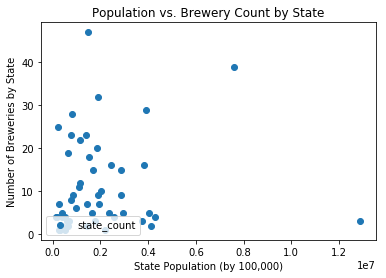

In [98]:
plt.scatter(x=df5["Population"], y=df5["state_count"])
plt.title("Population vs. Brewery Count by State")
plt.xlabel("State Population (by 100,000)")
plt.ylabel("Number of Breweries by State")
plt.legend(scatterpoints=1, loc="lower left", fontsize=10)
plt.show()

In [99]:
df_sort = df5.sort_values("state_count", inplace=True)

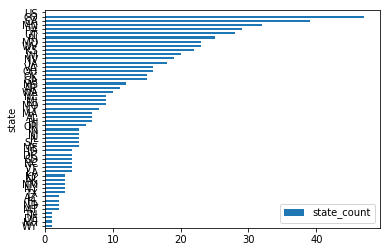

In [100]:
df5.plot(kind="barh", x="state", y="state_count")